In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

"""
This notebook makes different manifold learning plots (i.e. t-SNE, Isomap etc.)
to illustrate that those methods are not very useful in visualization of shapes 
in terms of topology, although they are supposed to learn "manifold", LMAO.
In this case we are using datasets from UCI repo.
"""

import os
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../')
sys.path.append('../paretoviz')
from paretoviz.utils import fmt
from paretoviz import decorator as dcor
from paretoviz import plotting as pplt

rndstate = np.random.RandomState(seed = 123)

# some ML data sets
# rawfpath = "../data/airofoil/airofoil-5d.out"
rawfpath = "../data/banknote/banknote-4d.out"
# rawfpath = "../data/blood/blood-4d.out"
# rawfpath = "../data/cccp/cccp-4d.out"
# rawfpath = "../data/concrete/concrete-8d.out"
# rawfpath = "../data/iris/iris-4d.out"
# rawfpath = "../data/mammogram/mammogram-5d.out"
# rawfpath = "../data/wil/wil-7d.out"
# rawfpath = "../data/yeast/yeast-8d.out"

# use the original obj values for scatter plot.
rawpoints = fmt.load(rawfpath)
U = np.array(rawpoints)

# get the path and filename from the rawfpath
path, rawfile = os.path.split(rawfpath)
# get the prefix
prefix = rawfile.split('.')[0]

# load the class labels
classfpath = os.path.join(path, prefix + "-class.out")
color = None
if os.path.exists(classfpath):
    labels = [v[0] if len(v) == 1 else v for v in \
            fmt.load(classfpath, dtype = dcor.dtypes[prefix])]
    color = dcor.recolor_by_labels(labels, dtype = dcor.dtypes[prefix])

<IPython.core.display.Javascript object>


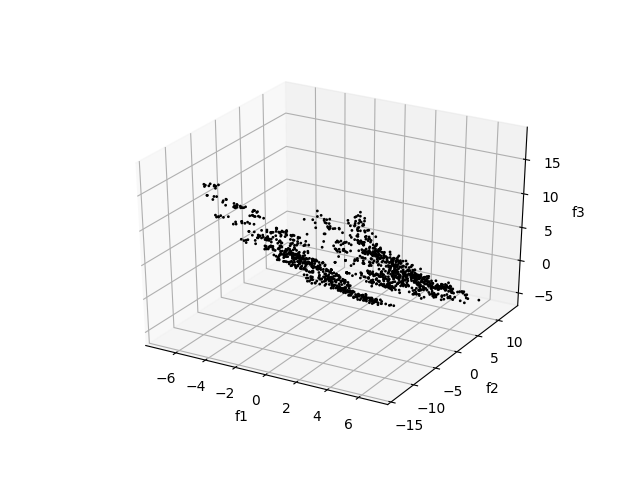

In [2]:
# Just test the scatter plot without any decorator
(fig, ax) = pplt.scatter(rawpoints)
# save the scatter plot
scatterfpath = os.path.join(path, prefix + "-scatter-nodeco.pdf")
plt.savefig(scatterfpath, transparent = False)

plt.show()

<IPython.core.display.Javascript object>


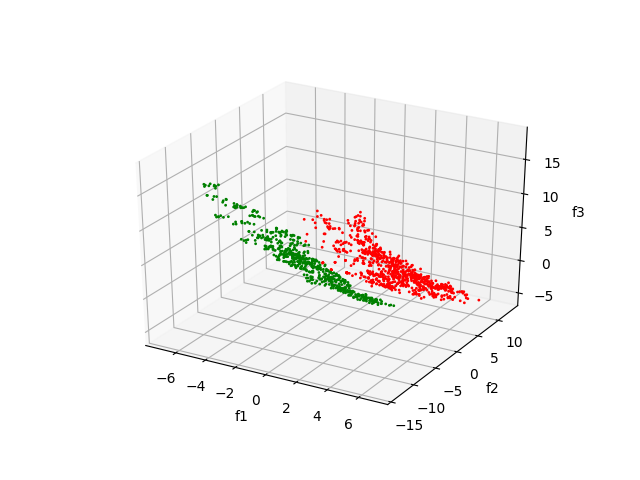

In [3]:
# do the scatter plot with color from labels
(fig, ax) = pplt.scatter(rawpoints, c = color)
# save the scatter plot
scatterfpath = os.path.join(path, prefix + "-scatter.pdf")
plt.savefig(scatterfpath, transparent = False)

plt.show()

In [4]:
import numpy as np
from sklearn.manifold import TSNE

"""
Do t-SNE on the data.
"""

tsne = TSNE(n_components = 2, verbose = True, random_state = rndstate)
F = tsne.fit_transform(U).tolist()
fmt.save(F, os.path.join(path, prefix + "-tsne.out"))
print("Done.")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1372 samples in 0.001s...
[t-SNE] Computed neighbors for 1372 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1372
[t-SNE] Computed conditional probabilities for sample 1372 / 1372
[t-SNE] Mean sigma: 1.106040
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.098400
[t-SNE] KL divergence after 1000 iterations: 0.297741
Done.


<IPython.core.display.Javascript object>


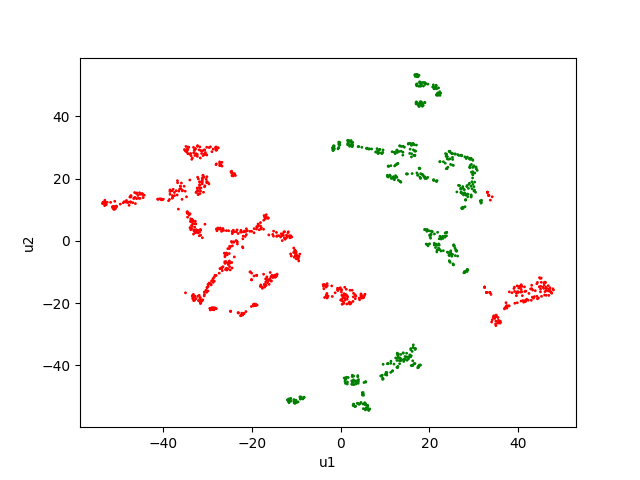

In [5]:
# now plot the t-SNE data points
f = fmt.load(os.path.join(path, prefix + "-tsne.out"))

(fig, ax) = pplt.scatter(f, c = color, label = 'u{:d}')

plt.savefig(os.path.join(path, prefix + "-tsne.pdf"), transparent = False)

plt.show()